In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import sqlite3

In [5]:
conn = sqlite3.connect("database.sqlite")

In [6]:
df = pd.read_sql_query("""select * from Reviews;""",conn)

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df.shape

(568454, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568454 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568454 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [11]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [12]:
df['Text_Length'] = df['Text'].apply(len)

In [13]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


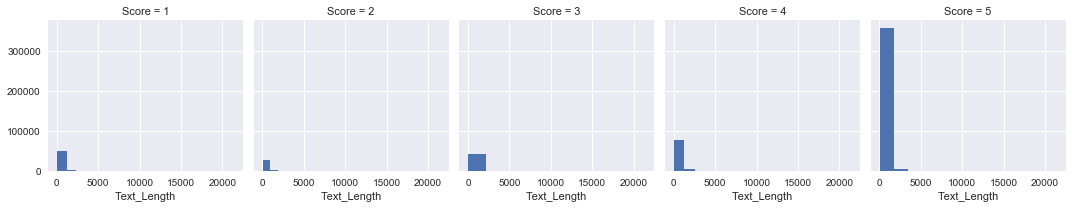

In [22]:
g = sns.FacetGrid(df,col='Score')
g= g.map(plt.hist,'Text_Length')

In [23]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_Length
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05,568454.000000
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09,436.222083
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07,445.339741
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08,12.000000
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09,179.000000
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09,302.000000
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09,527.000000
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09,21409.000000


In [82]:
df[df['Text_Length'] <=100]['Text'].iloc[0]
#1409

'good flavor! these came securely packed... they were fresh and delicious! i love these Twizzlers!'

In [33]:
df[df['Text_Length'] == 12]['Text'].iloc[0]

'Not worth it'

In [44]:
df_review = df[(df['Score'] ==1) | (df['Score'] == 5)][['Text','Score']]

In [92]:
df_review.tail(10)

,Text,Score
568442,This product is great. Gives you so much ener...,5
568443,I love this tea. I first discovered the pleas...,5
568444,"As a foodie, I use a lot of Chinese 5 Spice po...",5
568445,"You can make this mix yourself, but the Star A...",5
568447,"Hoping there is no MSG in this, this tastes ex...",5
568448,My only complaint is that there's so much of i...,5
568449,Great for sesame chicken..this is a good if no...,5
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5
568453,"I am very satisfied ,product is as advertised,...",5


In [47]:
df_review.shape

(415390, 2)

In [93]:
df_review['Score'].value_counts()

5    363122
1     52268
Name: Score, dtype: int64

### Train / Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [117]:
#Split the dataset into X and y
X = df_review['Text']
y = df_review['Score']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
4         Great taffy at a great price.  There was a wid...
6         This saltwater taffy had great flavors and was...
7         This taffy is so good.  It is very soft and ch...
8         Right now I'm mostly just sprouting this so my...
9         This is a very healthy dog food. Good for thei...
10        I don't know if it's the cactus or the tequila...
11        One of my boys needed to lose some weight and ...
12        My cats have been happily eating Felidae Plati...
14        The Strawberry Twizzlers are my guilty pleasur...
15        My daughter loves twizzlers and this shipment ...
17        I am very satisfied with my Twizzler purchase....
18        Twizzlers, Strawberry my childhood favorite ca...
19        Candy was delivered very fast and was purchase...
20        My husband is a Twizzlers addict.  We've bough...
21        I bought these for my husband 

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Vectorization - Tf/Idf

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf_vect = TfidfVectorizer(stop_words='english')

In [68]:
tfidf_bow = tfidf_vect.fit_transform(X_train)

In [69]:
tfidf_bow.shape

(290773, 86559)

## Create a Model

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
mnb = MultinomialNB()

In [76]:
mnb.fit(tfidf_bow,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [80]:
pred = mnb.predict(tfidf_vect.transform(['I have bought several of the Vitality canned dog food products and have found them \
                                        all to be of good quality. The product looks more like a stew than a processed meat\
                                        and it smells better.My Labrador is finicky and she appreciates this product better\
                                        than  most']))

In [81]:
print(pred)

[5]


In [85]:
print(mnb.predict(tfidf_vect.transform(['good flavor! these came securely packed... they were fresh and delicious! i love these Twizzlers!'])))

[5]


In [89]:
df_review['Text'].loc[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [90]:
print(mnb.predict(tfidf_vect.transform(['Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small \
sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'])))

[5]


In [94]:
pred = mnb.predict(tfidf_vect.transform(X_test))

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.96      0.16      0.28     15853
          5       0.89      1.00      0.94    108764

avg / total       0.90      0.89      0.86    124617



In [97]:
print(confusion_matrix(y_test,pred))

[[  2558  13295]
 [   108 108656]]


##### Build ML model using Summary column

In [98]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


In [101]:
df_summary = df[(df['Score'] == 1) | (df['Score'] == 5)][['Summary','Score']]

In [102]:
df_summary.head()

,Summary,Score
0,Good Quality Dog Food,5
1,Not as Advertised,1
4,Great taffy,5
6,Great! Just as good as the expensive brands!,5
7,"Wonderful, tasty taffy",5


In [138]:
#Split the dataset in to X and y
X1 = df_summary['Summary']
y1 = df_summary['Score']
y1.shape

(415390,)

### Train / Test Split

In [143]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=101)

#### Tfidf Vectorization

In [144]:
tfidf_vect = TfidfVectorizer(stop_words='english')

In [145]:
tfidf_bow = tfidf_vect.fit_transform(X1_train)

In [146]:
tfidf_bow.shape

(290773, 24219)

### Create a Model

In [155]:
X1_train.shape

(290773,)

In [148]:
mnb1 = MultinomialNB()
mnb1.fit(tfidf_bow,y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [150]:
pred1 = mnb1.predict(tfidf_vect.transform(X1_test))

In [151]:
print(classification_report(y1_test,pred1))

             precision    recall  f1-score   support

          1       0.91      0.52      0.66     15853
          5       0.93      0.99      0.96    108764

avg / total       0.93      0.93      0.92    124617



In [152]:
print(confusion_matrix(y1_test,pred1))

[[  8189   7664]
 [   797 107967]]
